# Project: Credit score prediction

## Conclusion: XGBoost regression R2 score is 0.94. Given limit criteria 25, percent of true prediction is  69%

Link to the dataset: https://www.kaggle.com/prasy46/credit-score-prediction

## About the data from a publisher:
We provide you with a data set in CSV format.
The data set contains 8,000 train instances and 2000 test instance
There are 304 input features, labeled x001 to x304.

The target variable is labeled y.

### Task Create a model to predict the target variable y.
A report - A Power point presentation
Any custom code you used
Instructions for me to run your model on a separate data set

# STEP 1: Learning the dataset and feature engineering

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for Q-Q plots

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold # for quasi-constant values detection

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the training dataset
df_train = pd.read_csv("CreditScore_train.csv")

In [3]:
# importing the test dataset
df_test = pd.read_csv("CreditScore_test.csv")

In [4]:
# showing first five rows of the training dateset
df_train.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


In [5]:
# showing the column names
# list(df_train.columns)

In [6]:
# showing statistical information about the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 305 entries, x001 to y
dtypes: float64(41), int64(264)
memory usage: 186.2 MB


In [7]:
# showing statistical data of the training dataset
df_train.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,8.000000e+04,62815.000000,62815.000000,62819.000000,75133.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,8.000000e+04,33562.000000,80000.000000,80000.000000,80000.000000,80000.000000,21529.000000,80000.000000,14544.000000,80000.000000
mean,1.218319e+06,125.607307,25.582520,65.379646,178.043563,0.313787,0.692450,1.385575,1.188738,1.026825,...,1.189691e+04,0.794797,0.543787,0.558600,0.582375,0.105762,2.941196,6443.203675,1.037589,619.397762
std,2.730146e+05,115.662548,49.067905,63.528938,124.431075,0.464034,1.364931,2.274164,2.014353,1.715173,...,3.325378e+04,0.281969,0.498082,0.496557,0.493171,0.307535,2.128464,24319.031452,0.328551,118.357217
min,5.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,300.000000
25%,9.745528e+05,32.000000,3.000000,19.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.638325,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.975800,524.000000
50%,1.235833e+06,100.000000,8.000000,48.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.852600,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.048700,599.000000
75%,1.445546e+06,180.000000,24.000000,92.000000,246.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.299750e+04,0.982100,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,1.185225,719.000000
max,1.677197e+06,718.000000,704.000000,704.000000,790.000000,1.000000,43.000000,108.000000,78.000000,33.000000,...,2.696702e+06,4.691900,1.000000,1.000000,1.000000,1.000000,9.000000,785537.000000,5.156900,839.000000


#### Duplicated rows

In [8]:
# checking duplicated rows
df_train.duplicated().sum()

0

#### Missing values

In [9]:
# checking missing values
df_train.isnull().any(axis = 1).sum()

79982

In [10]:
# counting null values per each column
null_cols = []
null_cols_names = []
for col in df_train.columns:
    if df_train[col].isnull().any() > 0:
        null_cols.append([col,df_train[col].isnull().sum()])
        null_cols_names.append(col)
print('There is {} features with null values'.format(len(null_cols)))
# null_cols

There is 41 features with null values


In [11]:
# deleting duplicated features from the train_set & test_set
df_train.drop(columns=null_cols_names,inplace=True)
df_test.drop(columns=null_cols_names,inplace=True)

In [12]:
# checking missing values
df_train.isnull().any(axis = 1).sum()

0

#### Constant features

In [13]:
# to find variables that contain only 1 label/value
# nunique() method from pandas is used, which returns the number
# of different values in a variable.

constant_features = [
    feat for feat in df_train.columns if df_train[feat].nunique() == 1
]


print('There is {} constant features'.format(len(constant_features)))
constant_features

There is 4 constant features


['x067', 'x094', 'x095', 'x096']

In [14]:
# dropping the constant features from the train_set & test_set
df_train.drop(columns=constant_features,inplace=True)
df_test.drop(columns=constant_features,inplace=True)

In [15]:
# showing statistical information about the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 260 entries, x001 to y
dtypes: int64(260)
memory usage: 158.7 MB


#### Quasi-constant features

In [16]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(df_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [17]:
# get_support is a boolean vector that indicates which features 
# are retained, that is, which features have a higher variance than
# the threshold we indicated.

# If we sum over get_support, we get the number
# of features that are not quasi-constant

sum(sel.get_support())

255

In [18]:
# let's print the number of quasi-constant features

quasi_constant = df_train.columns[~sel.get_support()]
print('There is {} quasi-constant features'.format(len(quasi_constant)))
quasi_constant

There is 5 quasi-constant features


Index(['x060', 'x077', 'x083', 'x084', 'x093'], dtype='object')

In [19]:
# percentage of observations showing each of the different values
# of the variable
for feat in quasi_constant:
    feat_values = df_train[feat].value_counts() / np.float(len(df_train))
    print(feat_values)

0    0.999975
1    0.000025
Name: x060, dtype: float64
0    0.996613
1    0.003350
2    0.000037
Name: x077, dtype: float64
0    0.990663
1    0.009338
Name: x083, dtype: float64
0    0.99485
1    0.00515
Name: x084, dtype: float64
0    0.999275
1    0.000725
Name: x093, dtype: float64


In [20]:
# dropping the constant features from the train_set & test_set
df_train.drop(columns=quasi_constant,inplace=True)
df_test.drop(columns=quasi_constant,inplace=True)

In [21]:
# showing statistical information about the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 255 entries, x001 to y
dtypes: int64(255)
memory usage: 155.6 MB


#### Correlated features

In [22]:
# building a dataframe with the correlation between features

corrmat = df_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.9]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,x279,x273,0.997320
1,x273,x279,0.997320
2,x121,x111,0.994722
3,x111,x121,0.994722
4,x206,x216,0.990288


In [23]:
# finding groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # finding all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # appending the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(df_train.shape[1]))

found 51 correlated groups
out of 255 total features


In [24]:
# printing out each group
for group in correlated_groups:
    print(group)
    print()

    feature1 feature2      corr
0       x279     x273  0.997320
58      x279     x292  0.971379
90      x279     x258  0.965053
103     x279     x281  0.963299

    feature1 feature2      corr
2       x121     x111  0.994722
60      x121     x120  0.971286
104     x121     x131  0.963061
227     x121     x130  0.934912
242     x121     x141  0.932285
342     x121     x146  0.905708
348     x121     x140  0.903316
357     x121     x119  0.902453

    feature1 feature2      corr
4       x206     x216  0.990288
57      x206     x221  0.971510
74      x206     x196  0.968253
174     x206     x205  0.949246
203     x206     x215  0.941140
270     x206     x220  0.925402
300     x206     x195  0.916348

    feature1 feature2      corr
12      x204     x214  0.988300
95      x204     x219  0.964618
100     x204     x194  0.963683
328     x204     x205  0.908785

    feature1 feature2      corr
14      x129     x139  0.988196
110     x129     x144  0.961506
142     x129     x119  0.956761
198 

#### Checking correlation with the target for features in each correlated group

In [25]:
# showing statistical information about the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 255 entries, x001 to y
dtypes: int64(255)
memory usage: 155.6 MB


In [26]:
# making a function to delete less correlated features and leave one most correlated feature for each group
def less_correlated_features(df_group):
    # making unique list of correlated features
    correlated_feat = df_group.feature2.append(df_group.feature1).unique().tolist()

    # adding 'y' to the list
    correlated_feat.append('y')
    # print(correlated_feat)
    # print('\n')

    # making list of correlation coefficient with 'y'
    corr_matrix = df_train[correlated_feat].corr(method='pearson')

    # making list of less correlatd features
    features_to_drop = pd.DataFrame(data=corr_matrix['y'].drop('y')).sort_values(by='y', ascending=False)
    features_to_drop = features_to_drop.iloc[1: , :]
    features_to_drop = features_to_drop.index.tolist()
    
    return features_to_drop

In [27]:
# deleting less correlated features and leaving one most correlated feature for each group
features_to_drop_total = []
for df_group in correlated_groups:
    feat = list(less_correlated_features(df_group))
    features_to_drop_total += feat 
print('Deleting {} features'.format(len(features_to_drop_total)))

# dropping the less correlated features from the train_set & test_set
df_train.drop(columns=features_to_drop_total,inplace=True)
df_test.drop(columns=features_to_drop_total,inplace=True)

Deleting 103 features


In [28]:
# showing statistical information about the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 162 entries, x001 to y
dtypes: int64(162)
memory usage: 98.9 MB


# STEP 2: Choosing best performing regression model

In [29]:
# making X_train, y_train, X_test and y_test
X_train = df_train.drop(columns=['y']).to_numpy()
X_test = df_test.drop(columns=['y']).to_numpy()
y_train = df_train['y'].to_numpy()
y_test = df_test['y'].to_numpy()

### Random forest regression

In [35]:
# training the random forest regression model on the Training set
# reg_rf = RandomForestRegressor(random_state=42)
# g_rf.fit(X_train, y_train)

# predicting the Test set results
# y_pred = reg_rf.predict(X_test)
# print('R square: {}'.format(r2_score(y_test, y_pred)))
# print('RMSE: {}'.format(mean_squared_error(y_test, y_pred,squared=True)))

### XGBoost regression

In [31]:
# training the XGBoost regression model on the Training set
reg_xgb = XGBRegressor(random_state=42)
reg_xgb.fit(X_train, y_train)

# predicting the Test set results
y_pred = reg_xgb.predict(X_test)
print('R square: {}'.format(r2_score(y_test, y_pred)))
print('RMSE: {}'.format(mean_squared_error(y_test, y_pred,squared=True)))

R square: 0.9396437736747255
RMSE: 852.9315701216731


In [65]:
# showing y_pred next to y_test
y_pred_t = y_pred.reshape((-1, 1))
y_test_t = y_test.reshape((-1, 1))
y = np.hstack((y_pred_t, y_test_t))
df_y = pd.DataFrame(data=y,columns=['Y_pred','Y_test'])
df_y.shape

(20000, 2)

#### Exploting the solution

In [69]:
df_y['Y_test - Y_pred'] = df_y['Y_test'] - df_y['Y_pred']

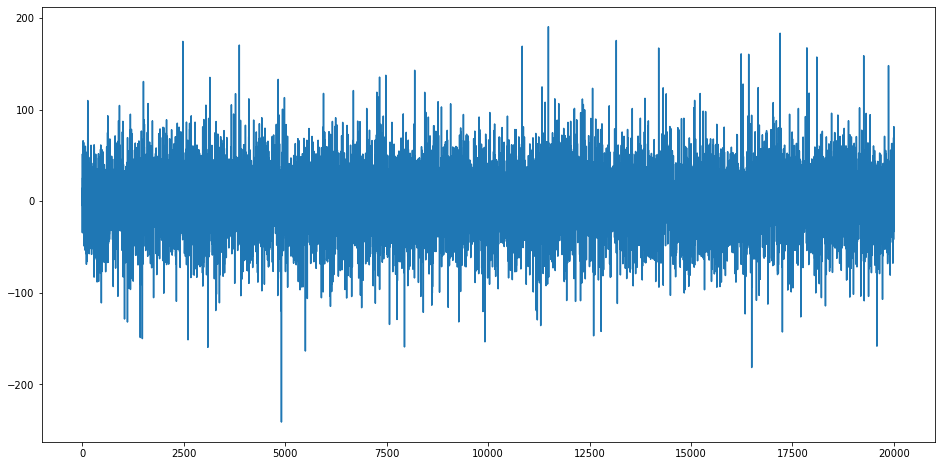

In [71]:
df_y['Y_test - Y_pred'].plot(figsize=(16,8));

In [115]:
# applying a limit criteria = abs(y_test - y_pred)
criteria = 25
def criterion(x):
    if np.abs(x) < criteria:
        return 1
    else:
        return 0

df_y['Criteria'] = df_y['Y_test - Y_pred'].apply(lambda x: criterion(x))

In [116]:
df_y_class = df_y['Criteria'].value_counts()
df_y_class

1    13761
0     6239
Name: Criteria, dtype: int64

In [119]:
print('Given limit criteria {}, percent of true prediction is {: .0%}'.format(criteria,df_y_class[1] / len(df_y)))

Given limit criteria 25, percent of true prediction is  69%


## Conclusion: XGBoost regression R2 score is 0.94. Given limit criteria 25, percent of true prediction is  69%